In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data_path = os.path.join(os.getcwd(), 'spotify_data.csv')
spotify_data = pd.read_csv(data_path, delimiter = ',',encoding ='cp437' )
spotify_data.shape[0]
spotify_data.head(4)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaet¿«n Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017/1/1,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017/1/1,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017/1/1,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017/1/1,ec


In [3]:
spotify_data.groupby('Region').nunique()

,Position,Track Name,Artist,Streams,URL,Date
Region,,,,,,
ar,200,870,350,37945,989,371
cl,200,457,205,11576,472,78
cr,200,797,321,13026,915,371
de,200,1714,627,52787,2004,371
ec,200,809,335,12912,948,371
ee,102,462,217,2310,533,265
fi,200,1785,715,27750,1996,371
fr,200,1625,495,42508,1848,371
it,200,1523,522,39522,1723,371


In [6]:
spotify_data.drop(['URL'],axis = 1,inplace = True)

KeyError: "['URL'] not found in axis"

In [20]:
ec = spotify_data.loc[spotify_data['Region'] == 'ec']
table = pd.pivot_table(spotify_data,
index = ['Region'],
    values = ['Streams'],
    aggfunc = {'Streams':[max,min,np.mean]})
print(table)
table.to_csv('streams_region.csv', header = True,index = True)


        Streams                       
            max           mean     min
Region                                
ar       455217   37425.494394    9747
cl       304108   25490.630013    7119
cr        55564    4890.498140    1385
de      1280932   81843.093154   22321
ec        64238    4291.666294    1153
ee         8244    1688.623801    1001
fi       196365   16793.494232    4480
fr       479164   42402.765997   13150
it       495971   32170.019030    5320
lt         7450    1807.470742    1001
no       388200   27102.760081    6631
nz       134171   10959.724137    3268
ph       367367   44755.169919   11004
sv        16297    2067.758440    1001
tr       259368   12494.627062    3510
tw        61222    6009.184744    1591
us      4068152  355588.681280  122488


In [29]:
a = ec.groupby('Track Name')['Position'].nunique()
a.to_csv('Track.csv')


In [11]:
eu1 = eu[eu.Date < datetime(2018,1,1).date()]
eu2 = eu1.groupby('Date')
eu3 = eu2['Streams'].head(3).reset_index(drop = True)
print(len(eu3))
print(eu2['Streams'].head(3).reset_index(drop = True))

1086
0       19272
1       19270
2       15761
3       16672
4       15594
        ...  
1081    30424
1082    30121
1083    31387
1084    31333
1085    30662
Name: Streams, Length: 1086, dtype: int64


In [16]:
eu4 = preprocessing.normalize([eu3])
print(len(eu4))
print(type(eu4))
print(eu4)

1
<class 'numpy.ndarray'>
[[0.0244118  0.02440927 0.01996442 ... 0.03975784 0.03968944 0.03883949]]


In [30]:
a = []
b = []
for i in range(1,31):
    b.append(i)
    b.append(i)
    b.append(i)
print(b)
n = 0
while n< len(eu3):
    for i in range(len(b)):
        if n < len(eu3):
            a.append(b[i])
            n += 1
        else:
            break
print(len(a))
print(a)


[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30]
1086
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30

In [31]:
d = eu4[0]
for i in range(len(eu4)):
    d[i] = 30*d[i]
c = np.array(list(zip(a,d)))
print(c[:,0])

[1. 1. 1. ... 2. 2. 2.]


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

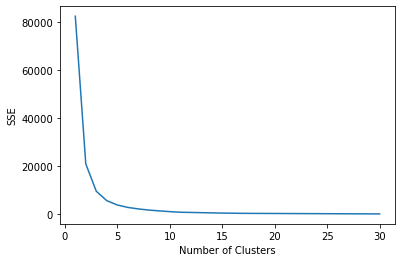

In [32]:
sse = []
for k in range(1,31):
    kmeans = KMeans(n_clusters = k,random_state=0).fit(c)
    sse.append(kmeans.inertia_)
plt.plot(range(1,31),sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [33]:
Kmeans = KMeans(n_clusters = 5,random_state = 0).fit(c)
print(Kmeans.labels_)

[4 4 4 ... 4 4 4]


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [34]:
print(pd.DataFrame(zip(Kmeans.labels_,a)))



      0  1
0     4  1
1     4  1
2     4  1
3     4  2
4     4  2
...  .. ..
1081  4  1
1082  4  1
1083  4  2
1084  4  2
1085  4  2

[1086 rows x 2 columns]


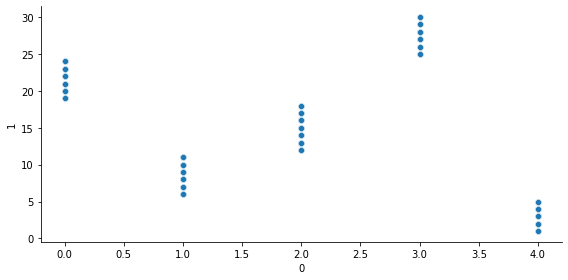

In [35]:
d = pd.DataFrame(zip(Kmeans.labels_,a))
grid = sns.relplot(data=d,
                   x=0,
                   y=1,
                   height=4,
                   aspect=2)
plt.show()